#**Application of Fuzzy Logic for Sprinkler Controller**

###**Installing scikit-fuzzy Library**

In [3]:

pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 1.0 MB/s eta 0:00:01     |███████████████████████████████▎| 972 kB 1.0 MB/s eta 0:00:01
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=1ec40d8f5e1a2104152209deb4d4fd5210af9b19006774ebf085bfcf6b3f66bb
  Stored in directory: /home/madi/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


###**Importing Libraries**

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

###**Declaring Constants**

In [5]:
HUMIDITY = 'humidity'
SPRINKLER_DURATION = 'sprinkler_duration'
TEMPRATURE = 'temperature'

# Temperature's fuzzy linguistics
COLD = 'Cold'
COOL = 'Cool'
NORMAL = 'Normal'
WARM = 'Warm'
HOT = 'Hot'

# Humidity's fuzzy linguistics
DRY = 'Dry'
MOIST = 'Moist'
WET = 'Wet'

# Sprinkler duration's fuzzy linguistics
SHORT = 'Short'
MEDIUM = 'Medium'
LONG = 'Long'

###**Setting The Antecedents & Consequent**

In [6]:
temperature = ctrl.Antecedent(np.arange(-10,55,5), TEMPRATURE)
humidity = ctrl.Antecedent(np.arange(0,105,5), HUMIDITY)
sprinkler_duration = ctrl.Consequent(np.arange(0,105,5), SPRINKLER_DURATION)

### **Assigning Membership Values To Temperature Using Triangular Membership Function**


/home/madi/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


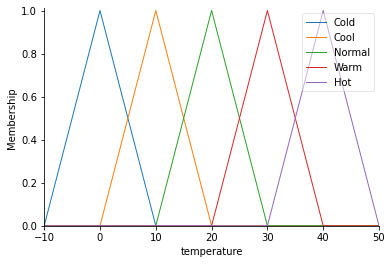

In [7]:
cold_parameter = [-10,0,10]
cool_parameter = [0,10,20]
normal_parameter = [10,20,30]
warm_parameter = [20,30,40]
hot_parameter = [30,40,50]

temperature[COLD] = fuzz.trimf(temperature.universe, cold_parameter)
temperature[COOL] = fuzz.trimf(temperature.universe, cool_parameter)
temperature[NORMAL] = fuzz.trimf(temperature.universe, normal_parameter)
temperature[WARM] = fuzz.trimf(temperature.universe, warm_parameter)
temperature[HOT] = fuzz.trimf(temperature.universe, hot_parameter)
temperature.view()

### **Assigning Membership Values To Humidity Using Triangular Membership Function**


/home/madi/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


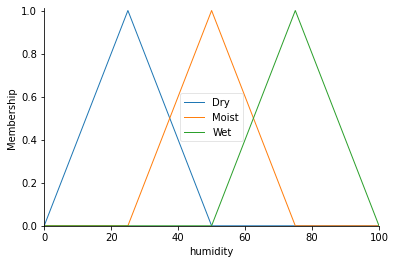

In [8]:
dry_parameter = [0,25,50]
moist_parameter = [25,50,75]
wet_parameter = [50,75,100]

humidity[DRY] = fuzz.trimf(humidity.universe, dry_parameter)
humidity[MOIST] = fuzz.trimf(humidity.universe, moist_parameter)
humidity[WET] = fuzz.trimf(humidity.universe, wet_parameter)
humidity.view()

### **Assigning Membership Values To Sprinkler Duration Using Triangular Membership Function**


/home/madi/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


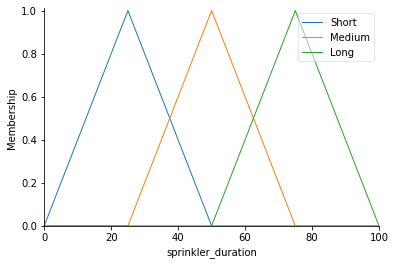

In [9]:
short_parameter = [0,25,50]
medium_parameter = [25,50,75]
long_parameter = [50,75,100]

sprinkler_duration[SHORT] = fuzz.trimf(sprinkler_duration.universe, short_parameter)
sprinkler_duration[MEDIUM] = fuzz.trimf(sprinkler_duration.universe, medium_parameter)
sprinkler_duration[LONG] = fuzz.trimf(sprinkler_duration.universe, long_parameter)
sprinkler_duration.view()

### **Setting The Rules For Performance**

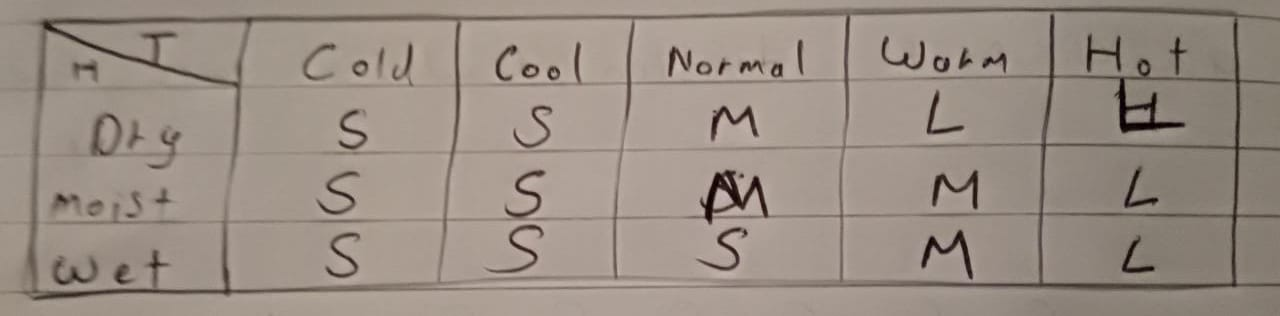

In [10]:
rule1 = ctrl.Rule(humidity[DRY] & temperature[COLD], sprinkler_duration[SHORT])
rule2 = ctrl.Rule(humidity[DRY] & temperature[COOL], sprinkler_duration[SHORT])
rule3 = ctrl.Rule(humidity[DRY] & temperature[NORMAL], sprinkler_duration[MEDIUM])
rule4 = ctrl.Rule(humidity[DRY] & temperature[WARM], sprinkler_duration[LONG])
rule5 = ctrl.Rule(humidity[DRY] & temperature[HOT], sprinkler_duration[LONG])
rule6 = ctrl.Rule(humidity[MOIST] & temperature[COLD], sprinkler_duration[SHORT])
rule7 = ctrl.Rule(humidity[MOIST] & temperature[COOL], sprinkler_duration[SHORT])
rule8 = ctrl.Rule(humidity[MOIST] & temperature[NORMAL], sprinkler_duration[MEDIUM])
rule9 = ctrl.Rule(humidity[MOIST] & temperature[WARM], sprinkler_duration[MEDIUM])
rule10 = ctrl.Rule(humidity[MOIST] & temperature[HOT], sprinkler_duration[LONG])
rule11 = ctrl.Rule(humidity[WET] & temperature[COLD], sprinkler_duration[SHORT])
rule12 = ctrl.Rule(humidity[WET] & temperature[COOL], sprinkler_duration[SHORT])
rule13 = ctrl.Rule(humidity[WET] & temperature[NORMAL], sprinkler_duration[SHORT])
rule14 = ctrl.Rule(humidity[WET] & temperature[WARM], sprinkler_duration[MEDIUM])
rule15 = ctrl.Rule(humidity[WET] & temperature[HOT], sprinkler_duration[LONG])

### **Rule List**

In [11]:
rule_list = [
             rule1, rule2, rule3, rule4, rule5, 
             rule6, rule7, rule8, rule9, rule10, 
             rule11, rule12, rule13, rule14, rule15
             ]

###**Invoking The System With Our Fuzzy Rules**

In [12]:
sprinkler_ctrl = ctrl.ControlSystem(rule_list)
sprinkler_analysis = ctrl.ControlSystemSimulation(sprinkler_ctrl)

###**Evaluating The Result Of A Student Using Fuzzy Logic**

In [13]:
sprinkler_analysis.input[TEMPRATURE] = 45
sprinkler_analysis.input[HUMIDITY] = 30

sprinkler_analysis.compute()
print(f'Evaluated Result: {str(round(sprinkler_analysis.output[SPRINKLER_DURATION], 2))} Min')

Evaluated Result: 75.0 Min


####**Visualizating The Result**

/home/madi/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


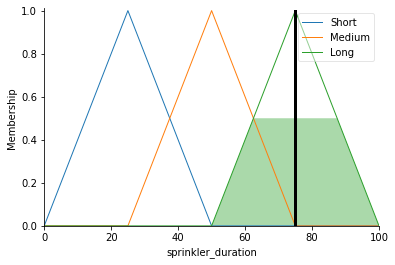

In [14]:
sprinkler_duration.view(sim=sprinkler_analysis)